---

<a href="https://github.com/rraadd88/roux/blob/master/examples/roux_lib_df_plot.ipynb"><img align="right" style="float:right;" src="https://img.shields.io/badge/-source-cccccc?style=flat-square"></a>

## ⌗ Plots in pipes.

**Optional requirements**

In [1]:
# to show logging messages
import logging
logging.getLogger().setLevel(logging.INFO)
## to create dfs for testing
import pandas as pd

## Import `r`oux-`d`ataframe attributes

In [2]:
import roux.lib.dfs as rd #noqa

## Basic data checks 

**Demo data**

In [3]:
import seaborn as sns
import numpy as np
data=sns.load_dataset('iris')
data=(
    data
    .assign(
    **{
        ## insert missing values 
        "sepal_length with missing values":lambda df: df['sepal_length'].apply(lambda x: np.nan if x>5 else x),
        'species id': lambda df: df.groupby('species')['species'].transform(lambda x: [f"item{i:02d}" for i in range(len(x))]),
        'id':lambda df: range(len(df)),
    }
    )
)
data.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length with missing values,species id,id
0,5.1,3.5,1.4,0.2,setosa,NaN,item00,0


## Plot

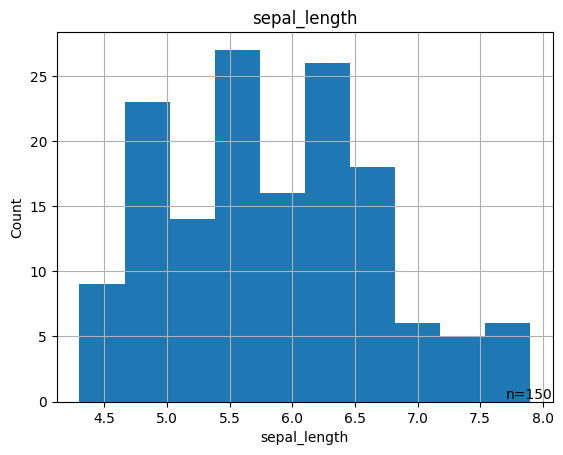

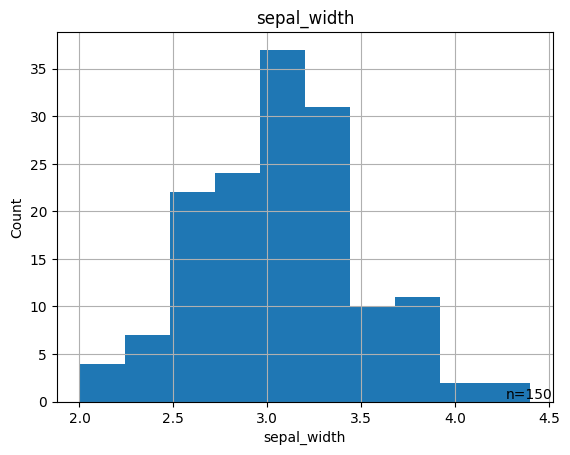

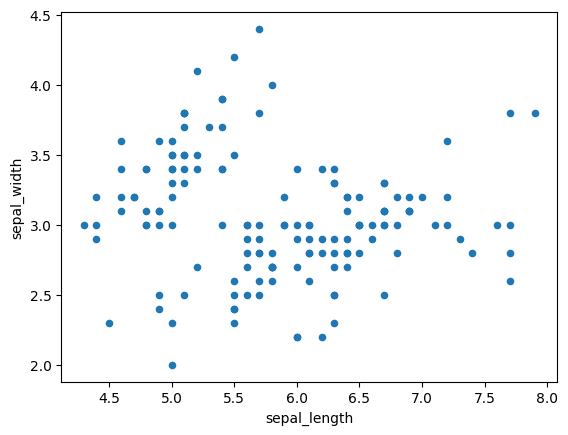

In [6]:
_=(
    data
        .rd.plot.hist(subset=['sepal_length'])
        .rd.plot.hist(subset=['sepal_width'])
        .rd.plot.scatter(x='sepal_length',y='sepal_width')    
)

In [5]:
assert _.compare(data).shape==(0,0), _

## Documentation
[`roux.lib`](https://github.com/rraadd88/roux#module-rouxlib)